In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys

url='https://publicinfobanjir.water.gov.my/aras-air/data-paras-air/?state=SRK&lang=en'

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)



====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/97.0.4692.71/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\Karafuru\.wdm\drivers\chromedriver\win32\97.0.4692.71]
<ipython-input-1-447afea43658>:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [2]:
import pandas as pd
from bs4 import BeautifulSoup

# load webpage into bs4
soup = BeautifulSoup(driver.page_source,'html.parser')

data = []

# Find all div
soup_div = soup.find_all('div')
soup_div

[<div class="site" id="page" style="transform: none;">
 <a class="skip-link screen-reader-text" href="#main">Skip to content</a>
 <style>
 .row {
     margin-right: 0px;
     margin-left: 0px;
 }
 
 .row.columns-master {
     margin: 0 auto;
 }
 
 #top-bar {
 		display: none;
     background: #333;
     width: 100%;
     border-bottom: 1px solid #f0f0f0;
     position: relative;
     color: #b3b3b3;
     -moz-box-shadow: inset 0 3px 0 rgba(0, 0, 0, 0.05);
     -webkit-box-shadow: inset 0 3px 0 rgba(0, 0, 0, 0.05);
     box-shadow: inset 0 3px 0 rgba(0, 0, 0, 0.05);
 }
 
 @media (max-width: 768px) {
 	#top-bar {
 	display: block;
 	}
 
 }
 </style>
 <div id="lang" style="display:none">en</div>
 <div id="top-bar">
 <div class="row">
 <div class="col-md-12">
 <div class="top-bar-content">
 <p style="text-align: center;">
 <span class="title_location" flow="down" language="" tooltip="Change"><i aria-hidden="true" class="fa fa-languages"></i><a class="sf-with-ul" href="/index.php?lang=my" s

In [3]:
#Finds all data with html tag of table, with a specific class and places them in soup_table
soup_table = soup.findAll('table', {'class':'normaltable-fluid'}) ## Look at table

In [4]:
#Displays information within the dataframe
soup_table

[<table border="1" class="normaltable-fluid" id="normaltable1">
 <thead>
 <tr>
 </tr><tr>
 <th rowspan="2" style="background-color: #2d7fc7;">No.</th><th rowspan="2" style="background-color: #2d7fc7;">Station ID</th><th rowspan="2" style="background-color: #2d7fc7; width: 15%;">Station Name</th>
 <th rowspan="2" style="background-color: #2d7fc7;">District</th>
 <th rowspan="2" style="background-color: #2d7fc7;">Main Basin</th>
 <th rowspan="2" style="background-color: #2d7fc7;">Sub River Basin</th>
 <th rowspan="2" style="background-color: #2d7fc7;">Last Updated</th>
 <th rowspan="2" style="background-color: #2d7fc7;">Water Level (m)<br/>(Graph)</th>
 <th class="text-center" colspan="4" style="background-color: #2d7fc7;">Threshold</th>
 </tr>
 <tr>
 <th style="background-color: #2d7fc7;">Normal	</th>
 <th id="alert" style="color:black;">Alert</th>
 <th id="warning" style="color:black;">Warning</th>
 <th id="danger" style="color:black;">Danger</th>
 </tr>
 </thead>
 <tbody>
 <tr class="

In [5]:
#Finds all data with html tag of 'tr' and places them in soup_table_tr
soup_table_tr = soup_table[0].find_all('tr')

In [6]:
#Displays information within the dataframe
soup_table_tr

[<tr>
 </tr>,
 <tr>
 <th rowspan="2" style="background-color: #2d7fc7;">No.</th><th rowspan="2" style="background-color: #2d7fc7;">Station ID</th><th rowspan="2" style="background-color: #2d7fc7; width: 15%;">Station Name</th>
 <th rowspan="2" style="background-color: #2d7fc7;">District</th>
 <th rowspan="2" style="background-color: #2d7fc7;">Main Basin</th>
 <th rowspan="2" style="background-color: #2d7fc7;">Sub River Basin</th>
 <th rowspan="2" style="background-color: #2d7fc7;">Last Updated</th>
 <th rowspan="2" style="background-color: #2d7fc7;">Water Level (m)<br/>(Graph)</th>
 <th class="text-center" colspan="4" style="background-color: #2d7fc7;">Threshold</th>
 </tr>,
 <tr>
 <th style="background-color: #2d7fc7;">Normal	</th>
 <th id="alert" style="color:black;">Alert</th>
 <th id="warning" style="color:black;">Warning</th>
 <th id="danger" style="color:black;">Danger</th>
 </tr>,
 <tr class="item"><td data-th="No">1</td><td data-th="Station ID">1599401</td><td data-th="Station 

In [8]:
#Create individual lists to be appended from each of the data extracted from the website
sta_Name = []
district_Name = []
main_Basin = []
sub_RivBasin = []
last_Update = []
water_Level = []
normal_Level = []
alert_Level = []
warning_Level = []
danger_Level = []

#Extracts each data from every column into specific lists
for i in range(3, 98):
    soup_table_tr_td = soup_table_tr[i].find_all('td')
    
    sta_Name.append(soup_table_tr_td[2].text)
    district_Name.append(soup_table_tr_td[3].text)
    main_Basin.append(soup_table_tr_td[4].text)
    sub_RivBasin.append(soup_table_tr_td[5].text) 
    last_Update.append(soup_table_tr_td[6].text)
    water_Level.append(soup_table_tr_td[7].find('a').text)
    normal_Level.append(soup_table_tr_td[8].text)
    alert_Level.append(soup_table_tr_td[9].text)
    warning_Level.append(soup_table_tr_td[10].text)
    danger_Level.append(soup_table_tr_td[11].text)

#Inserts data from each lists into specific dataframes        
df = pd.DataFrame(sta_Name)
df1 = pd.DataFrame(district_Name)
df2 = pd.DataFrame(main_Basin)
df3 = pd.DataFrame(sub_RivBasin)
df4 = pd.DataFrame(last_Update)
df5 = pd.DataFrame(water_Level)
df6 = pd.DataFrame(normal_Level)
df7 = pd.DataFrame(alert_Level)
df8 = pd.DataFrame(warning_Level)
df9 = pd.DataFrame(danger_Level)

In [9]:
soup_table_tr_td[7].find('a').text

'\n          2.97'

# Data Cleaning

In [10]:
#Checks each dataframe to ensure that the data is properly displayed
df5

,0
0,\n 7.45
1,\n 31.54
2,\n 14.39
3,\n 5.41
4,\n 11.34
...,...
90,\n 2.88
91,\n 3.21
92,\n 1.68
93,\n 0.15


In [11]:
#Combine the individual dataframes side-by-side into a single dataframe 
sarawakRiver = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=1)

In [12]:
sarawakRiver

,0,0,0,0,0,0,0,0,0,0
0,Ulu Batang Kayan,Kuching,Batang Kayan,Btg. Kayan,21/01/2022 16:45,\n 7.45,6.00,13.00,14.00,15.00
1,Aman 5 Bridge,Kuching,Sungai Sarawak,Sg. Semadang,21/01/2022 09:45,\n 31.54,31.20,37.40,37.58,38.00
2,Sungai Pedid,Kuching,Sungai Sarawak,Sg. Spora,21/01/2022 16:45,\n 14.39,14.25,20.53,20.71,21.13
3,Kampung Git,Kuching,Sungai Sarawak,Sg. Sarawak Kiri,21/01/2022 16:45,\n 5.41,4.55,12.10,12.60,13.10
4,Buan Bidi,Kuching,Sungai Sarawak,Sg. Sarawak Kanan,21/01/2022 16:45,\n 11.34,11.24,16.20,16.80,17.80
...,...,...,...,...,...,...,...,...,...,...
90,Marudi,Miri,Batang Baram,Btg. Baram,21/01/2022 16:45,\n 2.88,0.00,2.79,3.09,3.25
91,Beluru,Miri,Batang Baram,Sg. Bakong,21/01/2022 16:45,\n 3.21,2.00,4.30,5.10,5.50
92,Nanga Insungai,Limbang,Sungai Limbang,Sg. Mendalam,21/01/2022 16:45,\n 1.68,1.40,7.00,7.50,8.00
93,Limbang DID,Limbang,Sungai Limbang,Sg. Limbang,21/01/2022 14:15,\n 0.15,0.34,1.10,1.20,1.30


In [13]:
#Add specific headings to each of the columns
sarawakRiver.columns = ["Station Name", "District", "Main Basin", "Sub River Basin", "Last Updated", "Current Water Level", "Normal Threshold", "Alert Threshold", "Warning Threshold", "Danger Threshold"]

In [14]:
#to remove the special characters on the current water level column 
sarawakRiver['Current Water Level']=sarawakRiver['Current Water Level'].str.replace("\n","")

sarawakRiver

,Station Name,District,Main Basin,Sub River Basin,Last Updated,Current Water Level,Normal Threshold,Alert Threshold,Warning Threshold,Danger Threshold
0,Ulu Batang Kayan,Kuching,Batang Kayan,Btg. Kayan,21/01/2022 16:45,7.45,6.00,13.00,14.00,15.00
1,Aman 5 Bridge,Kuching,Sungai Sarawak,Sg. Semadang,21/01/2022 09:45,31.54,31.20,37.40,37.58,38.00
2,Sungai Pedid,Kuching,Sungai Sarawak,Sg. Spora,21/01/2022 16:45,14.39,14.25,20.53,20.71,21.13
3,Kampung Git,Kuching,Sungai Sarawak,Sg. Sarawak Kiri,21/01/2022 16:45,5.41,4.55,12.10,12.60,13.10
4,Buan Bidi,Kuching,Sungai Sarawak,Sg. Sarawak Kanan,21/01/2022 16:45,11.34,11.24,16.20,16.80,17.80
...,...,...,...,...,...,...,...,...,...,...
90,Marudi,Miri,Batang Baram,Btg. Baram,21/01/2022 16:45,2.88,0.00,2.79,3.09,3.25
91,Beluru,Miri,Batang Baram,Sg. Bakong,21/01/2022 16:45,3.21,2.00,4.30,5.10,5.50
92,Nanga Insungai,Limbang,Sungai Limbang,Sg. Mendalam,21/01/2022 16:45,1.68,1.40,7.00,7.50,8.00
93,Limbang DID,Limbang,Sungai Limbang,Sg. Limbang,21/01/2022 14:15,0.15,0.34,1.10,1.20,1.30


In [15]:
#to check the data type 
sarawakRiver.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Station Name         95 non-null     bool 
 1   District             95 non-null     bool 
 2   Main Basin           95 non-null     bool 
 3   Sub River Basin      95 non-null     bool 
 4   Last Updated         95 non-null     bool 
 5   Current Water Level  95 non-null     bool 
 6   Normal Threshold     95 non-null     bool 
 7   Alert Threshold      95 non-null     bool 
 8   Warning Threshold    95 non-null     bool 
 9   Danger Threshold     95 non-null     bool 
dtypes: bool(10)
memory usage: 1.1 KB


In [16]:
#converting the bool datatype to float for column 5 to column 9
sarawakRiver["Current Water Level"] = sarawakRiver["Current Water Level"].astype(float)
sarawakRiver["Normal Threshold"] = sarawakRiver["Normal Threshold"].astype(float)
sarawakRiver["Alert Threshold"] = sarawakRiver["Alert Threshold"].astype(float)
sarawakRiver["Warning Threshold"] = sarawakRiver["Warning Threshold"].astype(float)
sarawakRiver["Danger Threshold"] = sarawakRiver["Danger Threshold"].astype(float)

In [17]:
sarawakRiver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Station Name         95 non-null     object 
 1   District             95 non-null     object 
 2   Main Basin           95 non-null     object 
 3   Sub River Basin      95 non-null     object 
 4   Last Updated         95 non-null     object 
 5   Current Water Level  95 non-null     float64
 6   Normal Threshold     95 non-null     float64
 7   Alert Threshold      95 non-null     float64
 8   Warning Threshold    95 non-null     float64
 9   Danger Threshold     95 non-null     float64
dtypes: float64(5), object(5)
memory usage: 7.5+ KB


In [18]:
import numpy as np

# Danger
sarawakRiver['Status'] = np.where(sarawakRiver['Current Water Level'] >= sarawakRiver['Danger Threshold'], "Danger", "Normal")

# Warning
sarawakRiver['Status'] = np.where((sarawakRiver['Current Water Level'] >= sarawakRiver['Warning Threshold']) & (sarawakRiver['Current Water Level'] < sarawakRiver['Danger Threshold'])
                                 , "Warning", sarawakRiver['Status'])

# Alert
sarawakRiver['Status'] = np.where((sarawakRiver['Current Water Level'] >= sarawakRiver['Alert Threshold']) & (sarawakRiver['Current Water Level'] > sarawakRiver['Normal Threshold'])
                                 , "Alert", sarawakRiver['Status'])

# Normal
sarawakRiver['Status'] = np.where((sarawakRiver['Current Water Level'] < sarawakRiver['Alert Threshold']), "Normal", "Danger")

In [21]:
df2 = sarawakRiver['Status'].value_counts().to_frame()
df2

,Status
Normal,89
Danger,6


# Data Analysis

In [56]:
sarawakRiver['Current Water Level'].describe()

count    95.000000
mean      4.597579
std       6.494622
min      -1.400000
25%       0.630000
50%       2.440000
75%       6.305000
max      42.710000
Name: Current Water Level, dtype: float64

In [57]:
stats = sarawakRiver.groupby('Status')
stats.get_group('Danger')

,Station Name,District,Main Basin,Sub River Basin,Last Updated,Current Water Level,Normal Threshold,Alert Threshold,Warning Threshold,Danger Threshold,Status
29,Asajaya Water Intake,Samarahan,Batang Samarahan,Sg. Moyan,21/01/2022 16:30,2.73,1.03,2.60,3.20,3.80,Danger
80,Kuala Tutong,Miri,Batang Suai,Btg. Suai,21/01/2022 13:45,4.66,1.20,4.00,4.50,5.00,Danger
87,Benawa,Miri,Batang Baram,Btg. Baram,21/01/2022 16:45,6.36,3.50,6.00,7.00,8.00,Danger
88,Long Jegan,Miri,Batang Baram,Sg. Tinjar,21/01/2022 16:45,12.16,4.50,10.50,11.50,12.00,Danger
89,Long Teru,Miri,Batang Baram,Sg. Tinjar,21/01/2022 16:45,8.22,3.00,6.00,7.00,8.00,Danger
90,Marudi,Miri,Batang Baram,Btg. Baram,21/01/2022 16:45,2.88,0.00,2.79,3.09,3.25,Danger


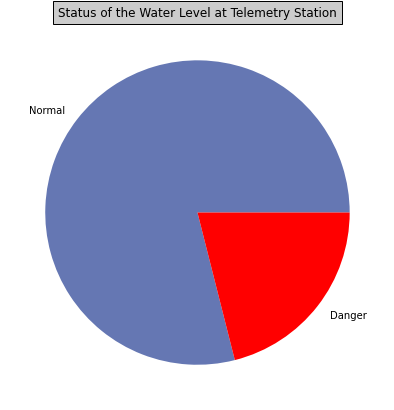

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
status = 'Normal', 'Danger'
frequency = 75, 20
colors = ["#6577b3", "#ff0000", ]
plt.pie(frequency, labels=status, colors=colors)
plt.title("Status of the Water Level at Telemetry Station", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

From the pie chart shown above, it is observed that there is high possibility that Sarawak is no longer in the raining season. Hence, majority of the areas are not at flood risk compared to the flood data shown in Department of Irrigation & Drainage Sarawak. However, there are 6 areas predominantly in Miri whereby the river level caused flooding and required the need to evacuate the villages. 



Note: The data from Public Info Banjir are constantly updated on daily basis. The current data was scrapped on 21 January 2022.

In [76]:
import plotly.express as px

fig = px.box(data_frame = sarawakRiver
       ,x = "Status"
       ,y = "Current Water Level"
       ,color= "Status"
       )

fig.update_layout(height=600, width=600, title = "Box Plot of Current Water Level")

fig.update_yaxes(range=[-5, 45])

From the box plot plotted, the overall current water level in the normal threshold are lowered than danger threshold. Despite the presence of outliers data, it does not reflects that the area is in the danger possibly due to bigger river basin size as compared to the others.

In [55]:
sarawakRiver.to_csv (r'C:\Users\Karafuru\Desktop\Forward School\ADS\Mini Project One\PIB Sarawak River.csv', index = False, header=True)